**Polynomial Regression**

Doğrusal bir regresyonda girdi (x) ve çıktı (y) arasında lineer (doğrusal/line) bir ilişki olduğu varsayılmaktadır. Öte yandan polinomsal regresyonda ise girdi ve çıktı arasındaki ilişki düz bir doğru biçiminde değildir. Burada bir doğru yerine eğriden (curve) bahsedebiliriz. Ve temelde polinomsal regresyon bize bu eğrinin fonksiyonunu vermektedir. Burada önemli olan kısım bu polinom fonksiyonunun hangi dereceyi alacağıdır (nth-degree polynomial).

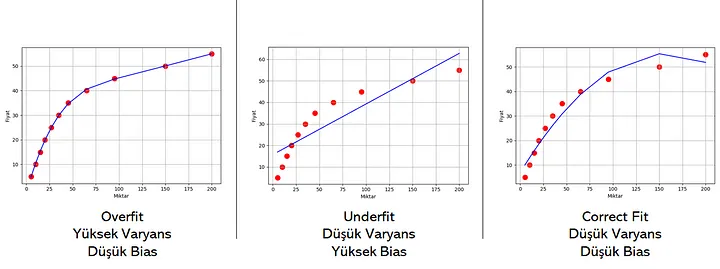

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv("/content/sample_data/polynomial+regression.csv",sep=";")
df.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [13]:
y=df.araba_max_hiz.values.reshape(-1,1)
x=df.araba_fiyat.values.reshape(-1,1)

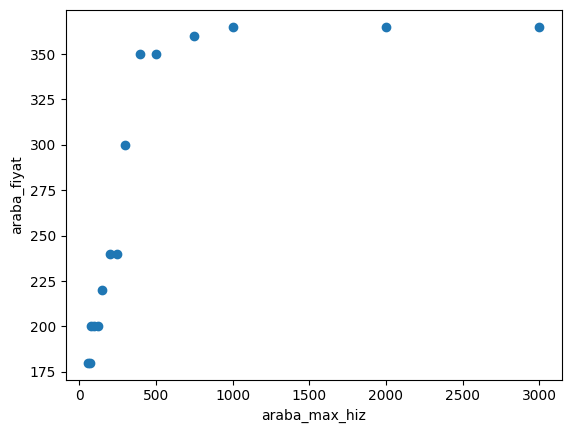

In [14]:
plt.scatter(x,y)
plt.xlabel("araba_max_hiz")
plt.ylabel("araba_fiyat")
plt.show()

Önce linear Şekilde Devam ediyor Sonra Birden Artış görülüyor.

In [ ]:
#Linear Regression = y = b0 + b1x
#Multiple Linear Regression = y = b0 + b1x1 + b2x2 ... + bnxn
#Polynomial Regression = y = b0 + b1x1 + b2x2^2 + b3x3^3 + b4x4^4...+ bnxn^n


In [15]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
lr.fit(x,y)

y_head=lr.predict(x)
print(y_head)

[[240.10817425]
 [240.7435423 ]
 [241.37891035]
 [242.64964646]
 [243.92038256]
 [245.82648672]
 [249.00332698]
 [252.18016724]
 [255.3570075 ]
 [261.71068803]
 [268.06436855]
 [283.94856986]
 [299.83277117]
 [363.3695764 ]
 [426.90638163]]


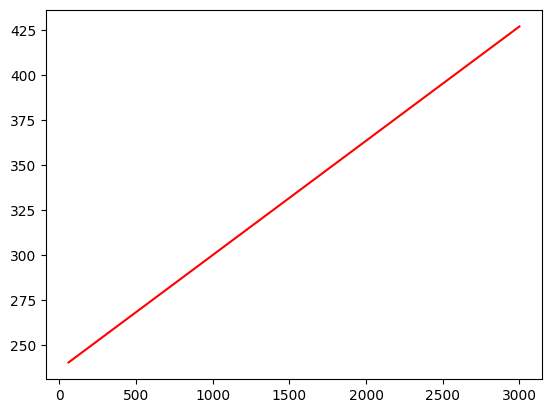

In [29]:
plt.plot(x,y_head,color="red",label="linear")

In [61]:
lr.predict([[500]])
#Arabamızın fiyatı 500 tl olunca hızı 268 km/sn oluyor ama Linear şekilinde ile   tam doğru tahmin edilemiyor bu yüzden Polynomial Regression ile tahmin edilebilir

array([[268.06436855]])

**Linear Regresyon olarak tahmin edemiyoruz o yüzden y=b0+b1x+b2x yerine y = b0 + b1x1 + b2x2^2 + b3x3^3 + b4x4^4...+ bnxn^n yaparak tahinimizi daha mantıklı yapmış oluruz**

In [31]:
#Polynomial Regression= y = b0 + b1x1 + b2x2^2 + b3x3^3 + b4x4^4...+ bnxn^n

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)

In [33]:
x_poly=poly_reg.fit_transform(x)
print(x_poly)
#Buradaki x_poly, x'in 2. derecesini temsil ediyor polinomsal olarak karesini alıyor

[[1.000e+00 6.000e+01 3.600e+03]
 [1.000e+00 7.000e+01 4.900e+03]
 [1.000e+00 8.000e+01 6.400e+03]
 [1.000e+00 1.000e+02 1.000e+04]
 [1.000e+00 1.200e+02 1.440e+04]
 [1.000e+00 1.500e+02 2.250e+04]
 [1.000e+00 2.000e+02 4.000e+04]
 [1.000e+00 2.500e+02 6.250e+04]
 [1.000e+00 3.000e+02 9.000e+04]
 [1.000e+00 4.000e+02 1.600e+05]
 [1.000e+00 5.000e+02 2.500e+05]
 [1.000e+00 7.500e+02 5.625e+05]
 [1.000e+00 1.000e+03 1.000e+06]
 [1.000e+00 2.000e+03 4.000e+06]
 [1.000e+00 3.000e+03 9.000e+06]]


In [34]:
linear_reg2=LinearRegression()
linear_reg2.fit(x_poly,y)

LinearRegression()

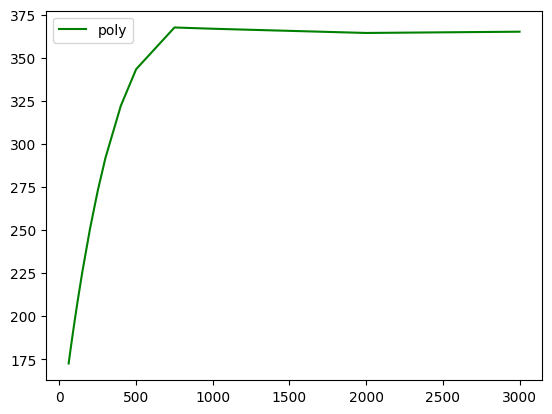

In [55]:
y_head2=linear_reg2.predict(x_poly)

plt.plot(x,y_head2,color="green",label="poly")
plt.legend()
plt.show()

In [ ]:
#Daha da iyi predict edebilmek için degree=3 veya 4 yaparak daha karmaşık hale getirebiliriz böylece daha iyi tahmin edebiliriz


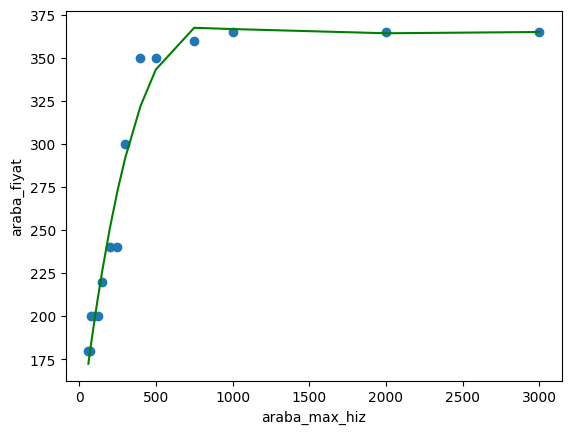

In [57]:
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x)


linear_reg3=LinearRegression()
linear_reg3.fit(x_poly,y)

y_head2=linear_reg3.predict(x_poly)

plt.scatter(x,y)
plt.xlabel("araba_max_hiz")
plt.ylabel("araba_fiyat")
plt.plot(x,y_head2,color="green",label="poly")
plt.show()



In [63]:
#10000 tl arabanın hıznı polinom regresyon ile tahmin edebiliriz
araba_tahmin=linear_reg3.predict(poly_reg.fit_transform([[500]]))
print("500 liralık arabanın fiyatı:",araba_tahmin)

500 liralık arabanın fiyatı: [[343.30417182]]


Polinom regresyon ile tahminimizi daha mantıklı ve daha doğru bir şekilde gerçekleştirmeyi sağladık.


Polinomsal Regresyonun Avantajları:


*   Polinomsal Regresyonun Avantajları
* Geniş fonksiyon yelpazesi altına sığabilir.
* Bu yaklaşım temel olarak geniş bir eğrilik alanına uyabilir.
*
Polinomsal regresyon, bağımlı ve bağımsız değişken arasındaki ilişkiye en iyi yaklaşımı verebilir.

**Polinomsal Regresyonun Dezavantajları**


1.   Aykırı değerlere karşı bir hassasiyet söz konusudur. Bu yüzden veride bir veya iki aykırı değer bulunması, doğrusal olmayan bir analizin sonuçlarını ciddi şekilde etkileyebilir

**Sonuç**

Polinomsal regresyon sınırları belli olan bir veri seti için uygun bir algoritmadır. Ancak veri setinin sınırlarının dışından gelen yeni veriler için hatası yüksek tahminlerde bulunabilir. Overfitting ve underfitting gibi konuları daha iyi anlamak için ise güzel bir algoritma deneyimi sağlar.